In [1]:
#Imports
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Apartado 1. Regresión Lineal Regularizada

In [2]:
#Funcion de la Hipotesis
def h_vec(x, theta):
    return np.dot(x, theta)

In [3]:
#Hipotesis
def hipotesis(X, Theta):
    return Theta[0] + Theta[1] * X

In [4]:
# Funcion de coste
def cost_funct(Theta, X, y, Lambda):
    m = X.shape[0]
    #h = np.dot(X, Theta[:, None])
    h = hipotesis(X, Theta)
    J = np.sum((h - y)**2)
    J = J/(2*m)
    reg_term = np.sum(Theta[1:]**2)
    reg_term = (reg_term*Lambda)/(2*m)
    J = J + reg_term
    return J

In [5]:
def gradient_funct(Theta, X, y, Lambda):
    X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    m = np.shape(X)[0]
    #h = np.dot(X, Theta[:, None])
    h = hipotesis(X, Theta)
    grad = np.matmul(X.T, h - y)
    grad = grad/m
    reg_term = (Lambda/m)*Theta
    grad = grad + reg_term
    grad = np.delete(grad, 0, 1)
    return grad

In [6]:
def draw_graph(Theta, X, y):
    plt.scatter(X, y, marker = 'x', c = 'red')
    y = hipotesis(X, Theta)
    plt.plot(X, y, c='blue')
    plt.legend()
    plt.show()

In [7]:
def main():
    #Cargamos los datos del fichero "ex5data1.mat'
    datafile = 'ex5data1.mat'
    mat = loadmat(datafile)
    X = mat.get("X")
    y = mat.get("y")
    
    Lambda = 0
    X_ones = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    Theta = np.ones(X_ones.shape[1])
    
    cost = cost_funct(Theta, X, y, Lambda)
    grad = gradient_funct(Theta, X, y, Lambda)
    m = np.shape(X)[0]
    
    print("cost:", cost)
    print("grad:", grad)
    
    result = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient_funct, args=(X, y, Lambda))
    ThetaOpt = result[0]

    draw_graph(ThetaOpt, X, y)

  NIT   NF   F                       GTG
    0    1  3.039515255535976E+02   3.58038434E+05
tnc: fscale = 0.000835613
    1    3  9.299577620594808E+01   1.36988337E+02
tnc: fscale = 0.0427197
    2    5  4.008670401834714E+01   2.25224917E+04
    3    7  2.237390649510906E+01   6.62767544E-11
tnc: fscale = 61417.1
tnc: |fn-fn-1] = 3.41188e-14 -> convergence
    4    9  2.237390649510902E+01   2.10473664E-13
tnc: Converged (|f_n-f_(n-1)| ~= 0)
No handles with labels found to put in legend.


(12, 1) (12, 1)
(21, 1) (21, 1)
-5.085426348834809 28.68873075847896
11.217589325366376 12.492955274415026
cost: 303.9515255535976
grad: [[-15.30301567]
 [598.16741084]]


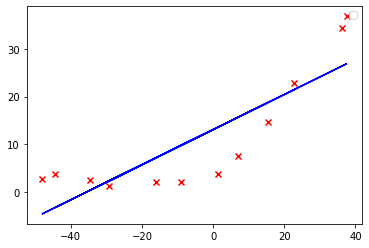

In [8]:
main()